In [3]:
### 라이브러리 정의
import numpy as np

### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [2]:
### 농어의 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

### 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

##### 농어의 길이를 이용해 무게 예측하기

- 독립변수 : 길이
- 종속변수 : 무게
<br>

- 종속변수의 데이터 형태는 "연속형 데이터" 형태이므로 -> 회귀분석 진행
    - 회귀분석의 예측결과 값은 "추정값" (정확한 값은 아님, 오차 있음)

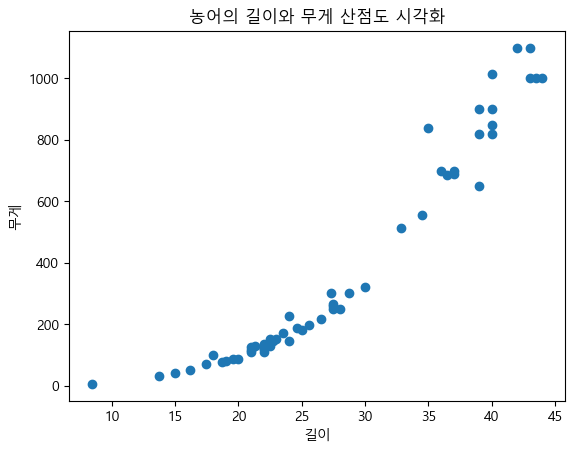

In [ ]:
### 농어의 길이와 무게를 산점도 그래프로 시각화 하기
# - 해석도 진행
plt.title("농어의 길이와 무게 산점도 시각화")

plt.scatter(perch_length, perch_weight)

plt.xlabel("길이")
plt.ylabel("무게")
plt.show()

### (해석)
# - x축의 길이가 커질수록, y축의 무게가 커지는 현상을 보이고 있음
# - 우상향의 양의 상관관계 분포를 보이고 있음
# - 따라서, 길이와 무게는 연관성이 있는 것으로 확인됨
# - 산점도의 형태는 선형을 나타내고 있으며, 곡선 형태를 띄고 있음
# - 길이를 이용해서 무게를 예측하는 회귀분석 방법인 선형 방정식을 이용하면 
#   예측하고자하는 무게에 대한 추정이 가능할 것으로 판단됨

### 선형 방정식에는 기울기와 절편이 있음
# - 직선의 방정식(y) = ax + b
# - 곡선의 방정식(y) = ax^2 + bx + c
# 선형 방정식에서 우리가 알고 있는 값은 : x값
# 모델이 알아서 찾아내는 값은 : 기울기, 절편

### 회귀모델은 선형의 형태를 스스로 판단하고,
#    - 스스로 기울기와 절편을 찾아냄
#    --> 스스로 판단하고 찾아내는 것을 --> 훈련(모델 훈련)

#### 데이터 분리하기

In [5]:
from sklearn.model_selection import train_test_split

In [ ]:
### 훈련 및 테스트 데이터로 분리
# - 분리 비율 : 75% : 25%
# - 랜덤규칙 : 42
# - 회귀분석에서는 편향을 고려하지 않아도 됨
# - 사용할 변수명 : train_input, train_target, test_input, test_target
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, test_size=0.25, random_state=42
)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [ ]:
### 훈련 및 테스트 독립변수의 차원이 1차원으로 되어 있음
# - 머신러닝에서는 독립변수의 차원은 2차원이어야 함
# - 훈련 및 테스트 독립변수의 차원을 2차원으로 만들려면
# print(f"원본 훈련 독립 데이터 : {train_input}")

### 2차원으로 변경하는 넘파이 함수 사용 : reshape(행, 열)
# 첫번째 값 : -1은 전체 행을 의미
# 두번째 값 : 생성할 열을 의미
# reshape(-1, 1) : train_input 데이터의 전체 행에 대한 1개의 열을 생성 (행, 열로 만들어냄)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [14]:
### 최종 원본
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 1) (42,)
(14, 1) (14,)


#### 회귀모델로 훈련하기

In [15]:
### KNN 회귀모델 라이브러리 정의하기
from sklearn.neighbors import KNeighborsRegressor

In [16]:
### 1. 모델 생성하기
knr = KNeighborsRegressor()

### 2. 모델 훈련시키기
knr.fit(train_input, train_target)

### 3. 훈련 및 테스트 결정계수(r2) 확인하기
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)

print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}")

훈련정확도 : 0.9698823289099254, 테스트정확도 : 0.992809406101064


- 회귀모델의 결정계수(정확도)
    - 회귀모델에서는 정확도라고 표현하지 않으며, "결정계수"라고 함
    - 결정계수의 다른 표현 : 결정력, 설명력 이라고 함
    - 결정계수 값의 범위 : 0 ~ 1 사이의 값 (1에 가까울 수록 좋음)
    - 결과 문서 작성시 
        - "훈련의 결정계수가 0.97로 설명력이 매우 좋은 모델로 판단됨" 이라고 작성함
- 모델이 좋다 나쁘다의 판단 기준 값으로 사용
- +- 0.03 정도의 오차가 있는 모델이라고 표현

In [19]:
### 4. 테스트 데이터로 예측해 보기
test_pred = knr.predict(test_input)
print(test_pred)
print(test_target)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
